In [1]:
################################################### top2vec ####################################################

In [2]:
import pandas as pd
import sys
from top2vec import Top2Vec
from nltk.corpus import stopwords
import nltk
from nltk.tokenize import punkt
from nltk.stem import WordNetLemmatizer
from collections import Counter
import umap.umap_ as umap
import umap.plot

nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:

def explore_nopd_topics():
    stop = stopwords.words("english")
    df = pd.read_csv("../data/fuse/com_new_orleans_so.csv").astype(str)
    df["allegation_desc"] = df["allegation_desc"].apply(
        lambda x: " ".join([word for word in x.split() if word not in (stop)])
    )

    df.loc[:, "topics"] = " ".join(x for x in df["allegation_desc"].astype(str))
    df = df["topics"][0]
    df = df.split()

    counts = Counter(df)
    most_occur = counts.most_common(50)
    print(most_occur)
    return df


In [4]:
explore_nopd_topics()

[('late', 515), ('reported', 485), ('duty.', 481), ('failed', 471), ('accused', 310), ('inmate', 155), ('observed', 145), ('complete', 127), ('deputy', 98), ('training.', 97), ('report', 90), ('duty', 89), ('uof', 83), ('mandatory', 81), ('refused', 76), ('proper', 72), ('inmates', 69), ('work', 65), ('rank', 58), ('found', 57), ('without', 56), ('inmate.', 56), ('minutes', 55), ('call.', 54), ('activate', 53), ('body', 52), ('rank.', 48), ('bwc', 48), ('left', 47), ('reporting', 47), ('worn', 43), ('camera', 41), ('cell', 39), ('attend', 39), ('duty/roll', 37), ('leaving', 37), ('allowed', 37), ('unprofessional', 37), ('working', 37), ('incident.', 36), ('uniform', 35), ('call', 35), ('incident', 34), ('assigned', 34), ('instructed', 34), ('pod', 33), ('admitted', 32), ('failure', 32), ('multiple', 32), ('verbal', 31)]


['refused',
 'assignment.',
 'left',
 'work',
 'without',
 'informing',
 'rank.',
 'reporting',
 'late',
 'duty.',
 'reported',
 'late',
 'duty/roll',
 'call.',
 'admitted',
 'clocking',
 'leaving',
 'work',
 'without',
 'permission.',
 'failed',
 'submit',
 'statement',
 'uof',
 'incident.',
 'accused',
 'clocking',
 'work',
 'various',
 'days;',
 'however,',
 'could',
 'located',
 'rank.',
 'failed',
 'conduct',
 'mandatory',
 'shakedown',
 'unit',
 'month',
 'may.',
 'failure',
 'complete',
 'proper',
 'observations',
 'rounds.',
 'accused',
 'telling',
 'inmate',
 'suck',
 'penis.',
 'accused',
 'completing',
 'two',
 'cell',
 'inspections',
 'per',
 'shift.',
 'accused',
 'completing',
 'reports',
 'two',
 'love',
 'letters',
 'received',
 'inmate.',
 'jpso',
 'found',
 '90',
 'grams',
 'cocaine',
 'home.',
 'failed',
 'activate',
 'bwc',
 'uof',
 'incident',
 'unit',
 'one.',
 'lieutenant',
 'crump',
 'sign',
 'temperator',
 'log',
 'refrigerator.',
 'reported',
 'late',
 'duty.'

In [5]:
# bigrams = [word for word in model.vocab if len(word.split()) == 2]
# print(bigrams[:20])

In [6]:

def create_model(df):
    df = df.astype(str)
    docs = [x for x in df["allegation_desc"]]
    # unique = [x for x in df["allegation_topic_uid"]]

    model = Top2Vec(
        docs,
        ngram_vocab=True,
        speed="deep-learn",
        use_embedding_model_tokenizer=True,
        min_count=5,
        # document_ids=unique
    )
    return model

In [7]:
def model():
    df = pd.read_csv("../data/fuse/com_new_orleans_so.csv")\
    .pipe(create_model)
    return df

In [8]:
model = model()

2022-10-23 19:00:51,996 - top2vec - INFO - Pre-processing documents for training
2022-10-23 19:00:52,044 - top2vec - INFO - Creating joint document/word embedding
2022-10-23 19:01:18,594 - top2vec - INFO - Creating lower dimension embedding of documents
2022-10-23 19:01:30,283 - top2vec - INFO - Finding dense areas of documents
2022-10-23 19:01:30,347 - top2vec - INFO - Finding topics


In [9]:
if len(model.get_topic_sizes()) > 1:
    topic_words, word_scores, topic_nums = model.get_topics()
    for words, scores, num in zip(topic_words, word_scores, topic_nums):
        print(num)
        print(f"Words: {words}")

0
Words: ['minutes' 'reported' 'late' 'mandatory training' 'manadatory'
 'complete mandatory' 'reporting' 'no call' 'no show' 'uniform shirt'
 'verbal altercation' 'roll call' 'in verbal' 'rounds' 'for' 'show'
 'proper observations' 'mandatory' 'test' 'fratinize with' 'duty' 'call'
 'observations' 'scheduled' 'attend manadatory' 'training class' 'do so'
 'take assignment' 'class' 'as insructed' 'observation rounds' 'no'
 'training' 'co worker' 'altercation with' 'as instructed' 'insructed'
 'attend' 'proper uniform' 'multiple occasion' 'assignment as'
 'active body' 'failure' 'drug' 'observation' 'obtaining' 'in timely'
 'with bleach' 'uniform' 'physical altercation']
1
Words: ['orleans justice' 'non' 'center' 'professional manner' 'justice'
 'orleans' 'contraband' 'get' 'clocking' 'restraints' 'involved' 'female'
 'having multiple' 'playing' 'into' 'written statement' 'allowing'
 'refusing' 'bringing' 'unattended' 'meeting' 'professional'
 'multiple occasion' 'refused' 'each shift' 'o

In [10]:
topic_sizes, top_nums = model.get_topic_sizes()
print(topic_sizes)
print(top_nums)

[371  96  87  78  77  74  71  70  67  60  59  58  56  53  52  49  46  45
  43  42  38  38  38  38  37  37  37  31  29  29  27  25]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31]


In [11]:
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=2, num_docs=10)

for doc, score, doc_id in list(zip(documents, document_scores, document_ids)):
    print(f"Document: {doc_id}, Score: {score}")
    print("--------------------")
    print(doc)
    print("--------------------")

Document: 126, Score: 0.8635655045509338
--------------------
accused of having suicide inmate out without restraints.
--------------------
Document: 1564, Score: 0.8510203957557678
--------------------
escorted inmate without restraints.
--------------------
Document: 1589, Score: 0.8503457307815552
--------------------
accused of taking deputy's commission during detail.
--------------------
Document: 1249, Score: 0.7875993847846985
--------------------
let a disruptive inmate out his cell.
--------------------
Document: 96, Score: 0.783687949180603
--------------------
accused of leaving her assigned area without notifying her supervisors.
--------------------
Document: 1133, Score: 0.7670750617980957
--------------------
allowed an inmate to conduct meal service.
--------------------
Document: 39, Score: 0.7514527440071106
--------------------
accused of not notifying his supervisor that an inmate was unable to be located for more than 2 hours.
--------------------
Document: 1772, 

In [12]:
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=5, num_docs=10)

ents = {(doc, score) for doc, score in list(zip(documents, document_scores))}
df = pd.DataFrame(ents, columns=["doc", "score"])
print(df)
# df.loc[:, "topic"] = "30"
# df.to_csv("../data/raw/new_orleans_pd/topics/topic_30.csv", index=False)

                                                 doc     score
0   deployed oc spray towards a noncompliant inmate.  0.876636
1     oleoresin capsicum spray without proper cause.  0.763284
2   observed to have deployed one burst of oc spray.  0.749943
3  deployed her oc spray as a tactic to intimidat...  0.807859
4        jpso found 90 grams of cocaine in her home.  0.756825
5  deputy demon cruse deployed a burst of oc sray...  0.756881
6                            failed to serve papers.  0.787369
7   observed to have deployed one burst of oc spray.  0.744713
8  accused of harassing employe cassie chesterfield.  0.778292
9                               accused of harassing  0.807310


In [13]:
# model.save("../data/topic_modelling/model/")

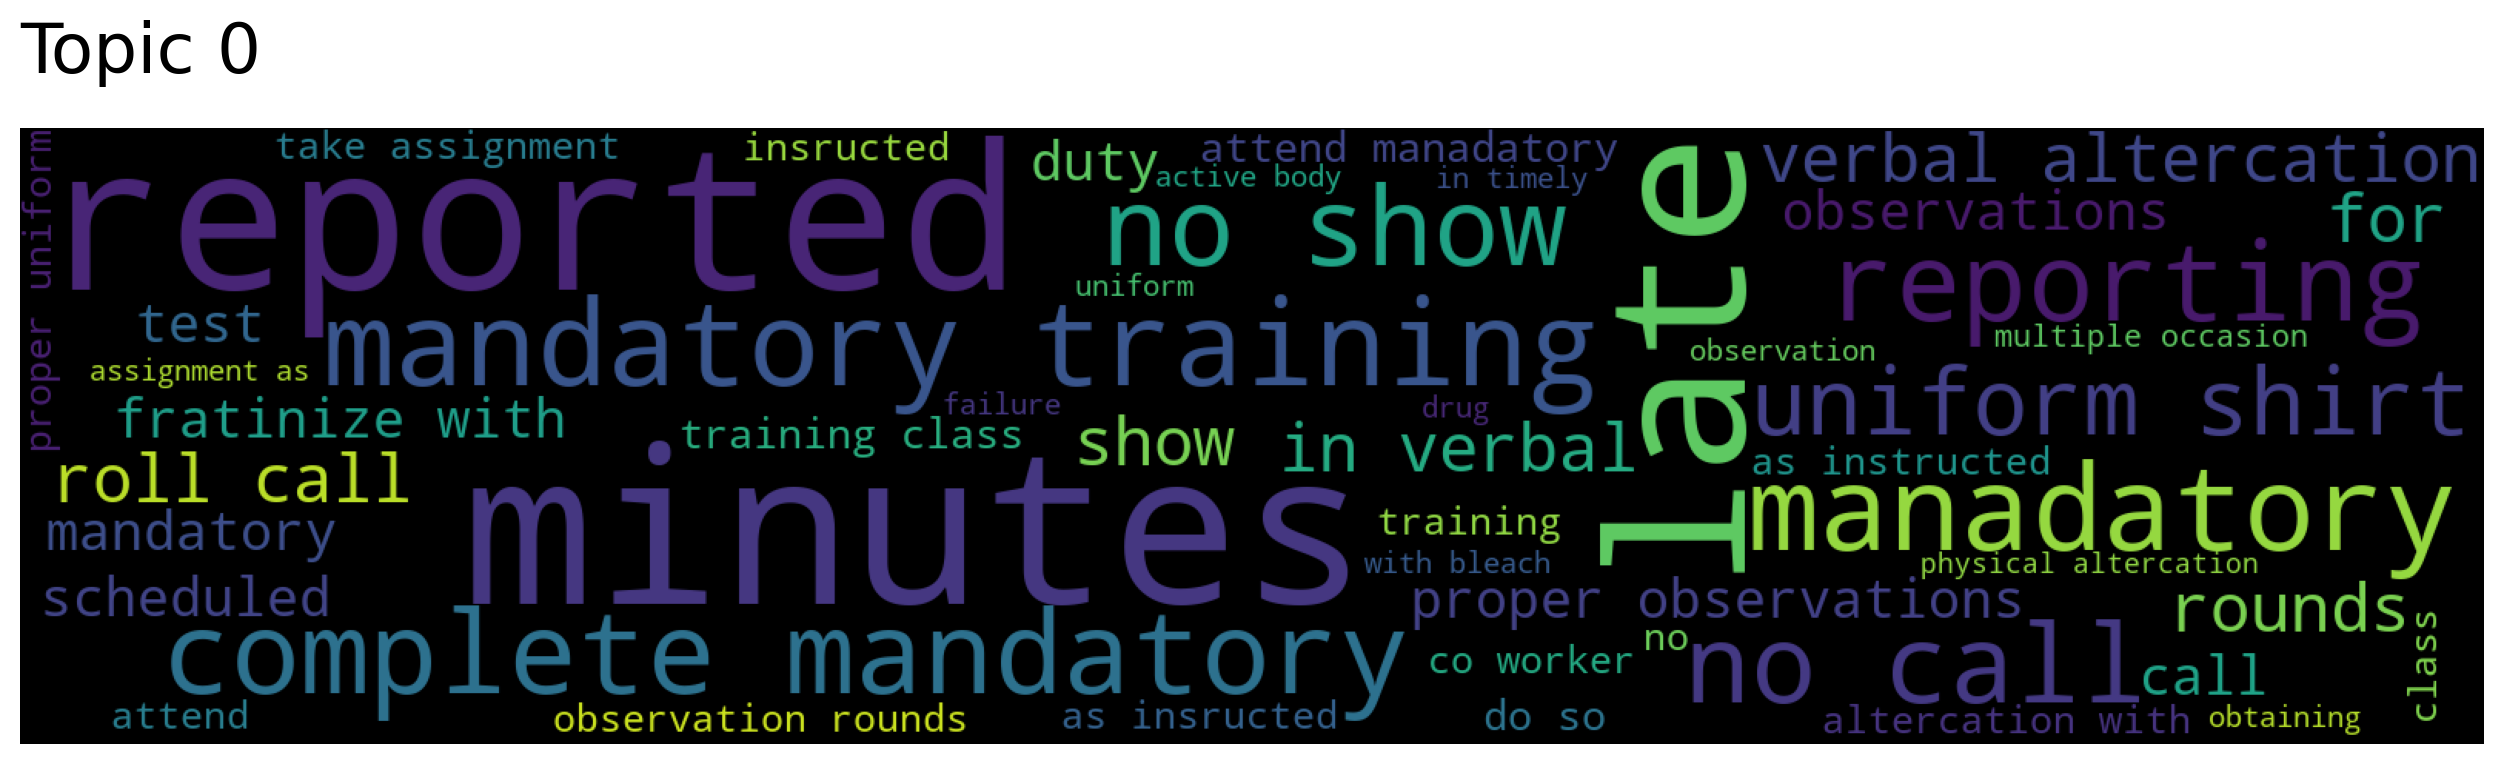

In [14]:
model.generate_topic_wordcloud(0)

In [15]:
model.topic_words

array([['minutes', 'reported', 'late', ..., 'with bleach', 'uniform',
        'physical altercation'],
       ['orleans justice', 'non', 'center', ..., 'assignment', 'working',
        'calling'],
       ['cell phone', 'without notifying', 'pass', ..., 'cell', 'making',
        'being released'],
       ...,
       ['at hours', 'clocked out', 'freeman', ..., 'lockdown',
        'assignment', 'required'],
       ['or', 'show', 'no call', ..., 'other inmates', 'each',
        'resulted'],
       ['observations', 'proper observations', 'uniform', ..., 'into',
        'post', 'verbal']], dtype='<U21')

In [16]:
model.topic_words[0]

array(['minutes', 'reported', 'late', 'mandatory training', 'manadatory',
       'complete mandatory', 'reporting', 'no call', 'no show',
       'uniform shirt', 'verbal altercation', 'roll call', 'in verbal',
       'rounds', 'for', 'show', 'proper observations', 'mandatory',
       'test', 'fratinize with', 'duty', 'call', 'observations',
       'scheduled', 'attend manadatory', 'training class', 'do so',
       'take assignment', 'class', 'as insructed', 'observation rounds',
       'no', 'training', 'co worker', 'altercation with', 'as instructed',
       'insructed', 'attend', 'proper uniform', 'multiple occasion',
       'assignment as', 'active body', 'failure', 'drug', 'observation',
       'obtaining', 'in timely', 'with bleach', 'uniform',
       'physical altercation'], dtype='<U21')

In [17]:
topic_words, word_scores, topic_nums = model.get_topics(2)
for words, scores, nums in zip(topic_words, word_scores, topic_nums):
  print("Topic Number: ",nums)
  print(f"Words: {words}")
  print("\n")

Topic Number:  0
Words: ['minutes' 'reported' 'late' 'mandatory training' 'manadatory'
 'complete mandatory' 'reporting' 'no call' 'no show' 'uniform shirt'
 'verbal altercation' 'roll call' 'in verbal' 'rounds' 'for' 'show'
 'proper observations' 'mandatory' 'test' 'fratinize with' 'duty' 'call'
 'observations' 'scheduled' 'attend manadatory' 'training class' 'do so'
 'take assignment' 'class' 'as insructed' 'observation rounds' 'no'
 'training' 'co worker' 'altercation with' 'as instructed' 'insructed'
 'attend' 'proper uniform' 'multiple occasion' 'assignment as'
 'active body' 'failure' 'drug' 'observation' 'obtaining' 'in timely'
 'with bleach' 'uniform' 'physical altercation']


Topic Number:  1
Words: ['orleans justice' 'non' 'center' 'professional manner' 'justice'
 'orleans' 'contraband' 'get' 'clocking' 'restraints' 'involved' 'female'
 'having multiple' 'playing' 'into' 'written statement' 'allowing'
 'refusing' 'bringing' 'unattended' 'meeting' 'professional'
 'multiple occ

In [18]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["inmate"], num_topics=5)
for word, w_score, topic, t_score in list(zip(topic_words, word_scores, topic_scores, topic_nums)):
    print(f"Word: \n{word}")
    print("--------------------")
    print(f"Word Score \n{w_score}")
    print("--------------------")
    print(f"Topic Score: \n{topic}")
    print("--------------------")
    print (f"Topic # \n{t_score}")
    print("--------END---------")

Word: 
['any' 'employee' 'clock' 'video' 'assist' 'captain' 'down' 'however'
 'place' 'relationship' 'up' 'hands' 'reassigned' 'between' 'agent'
 'through' 'take' 'with' 'was' 'fratinize with' 'times' 'property' 'off'
 'have' 'she' 'custody' 'would' 'their' 'opso' 'altercation with'
 'deputy menina' 'occasions' 'head' 'desk' 'on' 'protective' 'inmates'
 'disrespectful' 'as insructed' 'physical altercation' 'stated' 'job'
 'asleep' 'having' 'pass' 'sheet' 'active body' 'made' 'window' 'not']
--------------------
Word Score 
[0.88423973 0.86781436 0.860528   0.8395208  0.8337281  0.79882735
 0.77346945 0.7282877  0.6717699  0.6457794  0.6435779  0.62393326
 0.5757685  0.57385445 0.571125   0.57041854 0.55934936 0.55931324
 0.55801964 0.5478957  0.54695827 0.535688   0.5351517  0.531754
 0.52856565 0.52690065 0.51825327 0.5177987  0.51608515 0.5155836
 0.5125818  0.5095359  0.50088125 0.49749503 0.49730372 0.49362952
 0.48675716 0.47971928 0.4792948  0.47850558 0.477174   0.47545284
 0.47

In [19]:
# model = Top2Vec.load("../data/topic_modelling/model/")

# umap_args = {
#     "n_neighbors": 15,
#     "n_components": 2, # 5 -> 2 for plotting 
#     "metric": "cosine",
# }
# umap_model = umap.UMAP(**umap_args).fit(model.topic_vectors)
# umap.plot.points(umap_model, labels=model.doc_top_reduced)

In [20]:
############################################################ bert #################################################################

In [21]:
from bertopic import BERTopic
import json

In [22]:
def preprocess_noso(df):
    return df[~((df.allegation_desc.fillna("") == ""))]

In [23]:
cprr = pd.read_csv("../data/fuse/com_new_orleans_so.csv")
cprr = cprr.pipe(preprocess_noso)


In [24]:
cprr.shape

(1950, 14)

In [25]:
docs = cprr.allegation_desc

In [26]:
docs = json.loads(docs.to_json(orient='records'))

In [27]:
docs[0]

'refused an assignment.'

In [28]:
topic_model = BERTopic(embedding_model="all-MiniLM-L6-v2")

In [29]:
topic, probs = topic_model.fit_transform(docs)

In [30]:
topic_model.get_topic_info()

,Topic,Count,Name
0,-1,287,-1_of_accused_was_on
1,0,364,0_reported_late_duty_for
2,1,70,1_mandatory_training_complete_failed
3,2,61,2_refused_assignment_insructed_without
4,3,48,3_inmate_medical_upon_obtaining
5,4,47,4_inmate_an_giving_penis
6,5,46,5_bwc_activate_missing_are
7,6,46,6_minutes_reported_late_duty
8,7,45,7_leaving_accused_refusing_of
9,8,41,8_unauthorized_detail_working_officals


In [31]:
topic_model.get_topic(3)

[('inmate', 0.05983052649557994),
 ('medical', 0.04611719274100029),
 ('upon', 0.04455527511563247),
 ('obtaining', 0.04373156557379618),
 ('regain', 0.04373156557379618),
 ('properly', 0.04227125016092512),
 ('several', 0.04227125016092512),
 ('inmates', 0.04097501771496661),
 ('fight', 0.040601924370026285),
 ('knowledge', 0.040601924370026285)]

In [32]:
topic_model.get_representative_docs(3)

['failed to report an inmate fight.',
 'failed to properly supervise an inmate.',
 'failed to report an inmate fight.']

In [33]:
topic_model.visualize_topics()

In [34]:
topic_model.visualize_barchart()

In [35]:
df_bert = pd.DataFrame({"topic": topic, "documents": docs})

In [36]:
df_bert

,topic,documents
0,2,refused an assignment.
1,41,left work without informing her rank.
2,14,reporting late for duty.
3,11,reported late for duty/roll call.
4,7,admitted to clocking out and leaving work with...
...,...,...
1945,0,reported late for duty.
1946,1,failed to complete mandatory training.
1947,7,obsserved clocking in and leaving the facility.
1948,6,reported 57 minutes late for duty.


In [37]:
############################################################ gensim ##############################################################################

In [38]:
import numpy as np
import json
import glob
import gensim
import gensim.corpora as corpora 
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import spacy
import pandas as pd

import spacy
from nltk.corpus import stopwords

import pyLDAvis
import pyLDAvis.gensim_models

c:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\past\builtins\misc.py:45: DeprecationWarning:

the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses



In [39]:
noso = pd.read_csv("../data/fuse/com_new_orleans_so.csv")

In [40]:
def preprocess_gensim(df):
    df = df.astype(str).fillna("").dropna()
    return df[~((df.allegation_desc.fillna("") == ""))].dropna()

In [41]:
noso = noso.pipe(preprocess_gensim)

In [42]:
docs = noso.allegation_desc

In [43]:
def lemmatization(descs, allowed_pos_tags=["NOUN", "ADJ", "VERB", "ADV"]):
    nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
    final_text = []
    for desc in descs:
        doc = nlp(desc)
        new_text = " ".join([token.lemma_ for token in doc if token.pos_ in allowed_pos_tags])
        final_text.append(new_text)
    return (final_text)

In [44]:
lemmatized_texts = lemmatization(docs)

In [45]:
def gen_words(texts):
    final = []
    for text in texts:
        new = gensim.utils.simple_preprocess(text, deacc=True)
        final.append(new)
    return (final)

In [46]:
data_words = gen_words(lemmatized_texts)

In [47]:
id2word = corpora.Dictionary(data_words)

corpus = []
for text in data_words:
    new = id2word.doc2bow(text)
    corpus.append(new)

In [48]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=30,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha="auto")

In [49]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, mds="mmds", R=30)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
14    -0.429587 -0.370785       1        1  20.865832
6      0.101717 -0.477139       2        1   8.991258
8     -0.459982 -0.031137       3        1   6.186095
29     0.292409 -0.331675       4        1   5.788722
11     0.394646 -0.245796       5        1   5.597812
19     0.455843 -0.009010       6        1   5.361893
4      0.393094  0.256747       7        1   4.150833
13     0.198419 -0.281002       8        1   4.020254
2     -0.313620 -0.157016       9        1   3.835984
23    -0.061655 -0.381189      10        1   3.772147
10    -0.379394  0.089343      11        1   3.207824
22    -0.349032  0.205254      12        1   2.905280
18    -0.218754 -0.306526      13        1   2.330103
20     0.005544 -0.292662      14        1   2.248808
9      0.083690  0.420212      15        1   2.170045
26    -0.121386  0.385081      16        1   2.095141
25    -0.222860  0.294066      17        1   2.056523
1     -0.198590 -0.068015      18        1   1.936470
17     0.025267 -0.081916      19        1   1.690240
21     0.229404 -0.093144      20        1   1.528822
3      0.268095  0.075276      21        1   1.446671
24     0.217377  0.249413      22        1   1.435921
12    -0.138101  0.102501      23        1   1.379129
5      0.130277  0.227291      24        1   1.275578
28    -0.071055  0.225402      25        1   1.245245
15     0.027416  0.268473      26        1   1.070639
16     0.111118  0.083834      27        1   0.781919
27     0.009900  0.081374      28        1   0.208271
7      0.009900  0.081374      29        1   0.208271
0      0.009900  0.081374      30        1   0.208271, topic_info=         Term        Freq       Total Category  logprob  loglift
18     accuse  529.000000  529.000000  Default   30.000  30.0000
6        duty  717.000000  717.000000  Default   29.000  29.0000
14       fail  613.000000  613.000000  Default   28.000  28.0000
8      report  678.000000  678.000000  Default   27.000  27.0000
7        late  563.000000  563.000000  Default   26.000  26.0000
..        ...         ...         ...      ...      ...      ...
25      month    0.018293    1.179760  Topic30   -6.993   2.0075
26  shakedown    0.018293   11.475732  Topic30   -6.993  -0.2674
27       unit    0.018293   48.772884  Topic30   -6.993  -1.7143
28   complete    0.018293  131.474348  Topic30   -6.993  -2.7060
29    failure    0.018293   27.047911  Topic30   -6.993  -1.1248

[1343 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
18        3  0.990604    accuse
18       19  0.007547    accuse
171      21  0.851178       act
47       10  0.684892  activate
47       12  0.302627  activate
...     ...       ...       ...
71       12  0.887656     watch
104      12  0.982426      wear
5         7  0.993324      work
110      13  0.965993    worker
156      23  0.966456     write

[188 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[15, 7, 9, 30, 12, 20, 5, 14, 3, 24, 11, 23, 19, 21, 10, 27, 26, 2, 18, 22, 4, 25, 13, 6, 29, 16, 17, 28, 8, 1])